In [58]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
%pip install matplotlib

Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [59]:
words = open('names.txt').read().splitlines()

In [60]:
print(words[:10])

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


In [61]:
len(words)

32033

In [62]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        # print(ch1, ch2)

In [63]:
sorted(b.items(), key=lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [64]:
import torch

In [65]:
N = torch.zeros((27,27), dtype=torch.int32)

In [79]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
# stoi['<E>'] = 27

itos = {i:s for s,i in stoi.items()}

In [80]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

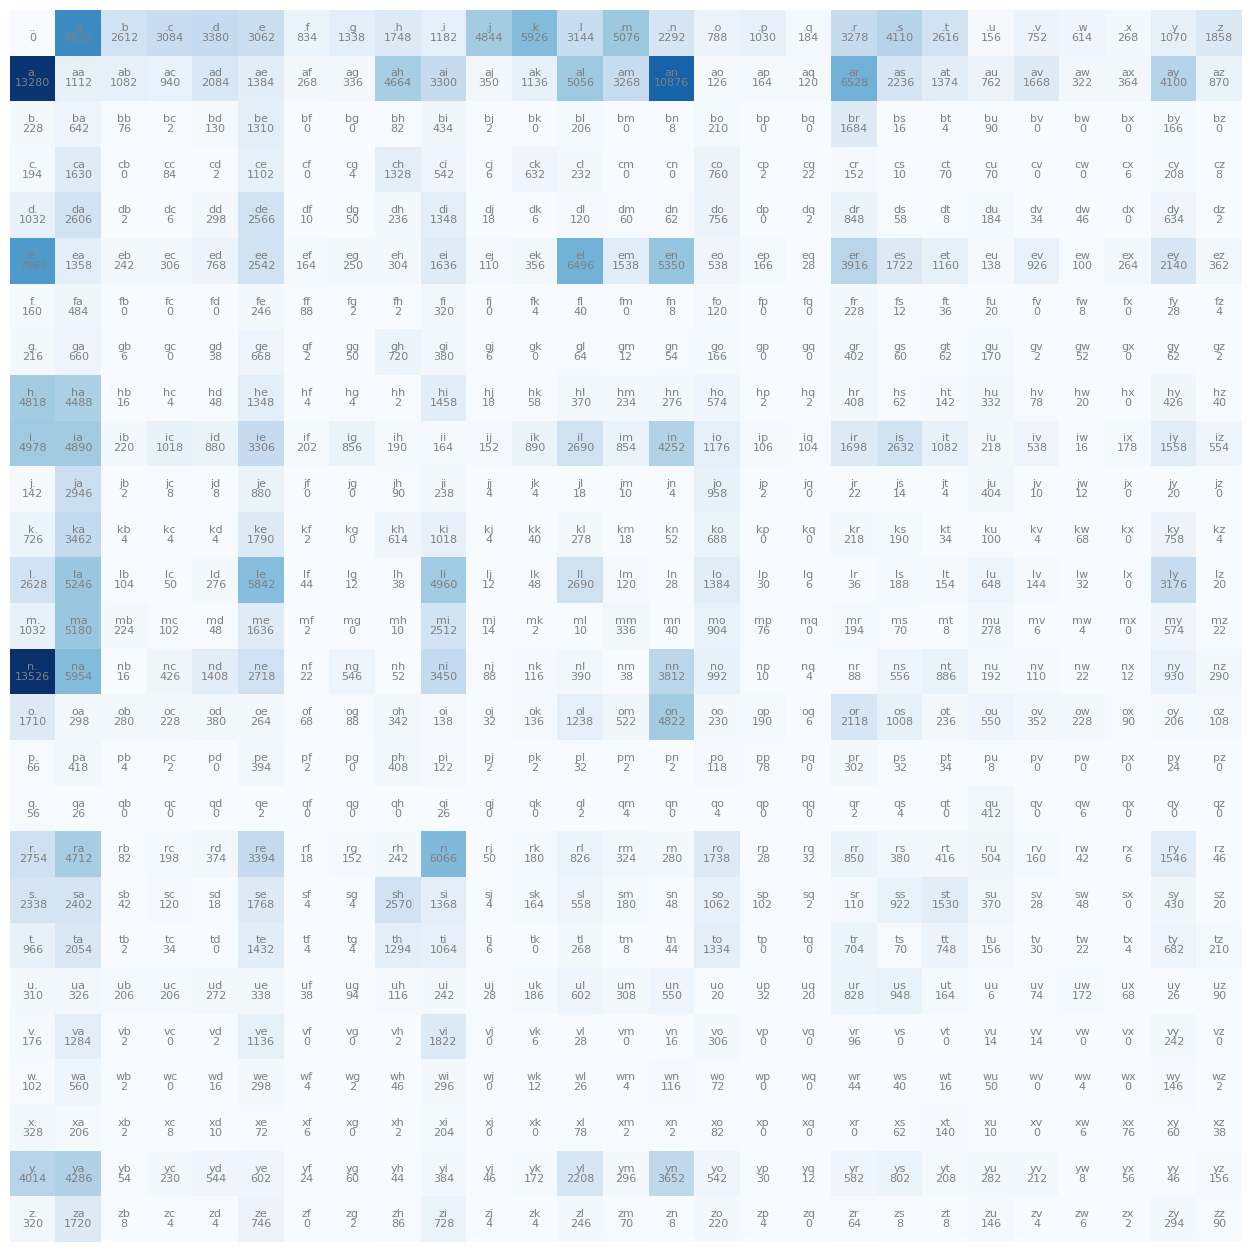

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        plt.text(j, i, itos[i]+itos[j], ha='center', va='bottom', color='gray', fontsize=8)
        plt.text(j, i, N[i,j].item(), ha='center', va='top', color='gray', fontsize=8)
plt.axis('off')

In [82]:
N[0, :]

tensor([   0, 8820, 2612, 3084, 3380, 3062,  834, 1338, 1748, 1182, 4844, 5926,
        3144, 5076, 2292,  788, 1030,  184, 3278, 4110, 2616,  156,  752,  614,
         268, 1070, 1858], dtype=torch.int32)

In [83]:
p = N[0].float()
p = p / p.sum() # normalize to probabilities
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [84]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [101]:
# P = N.float() # add-one smoothing 
P = (N+1).float() # add-one smoothing
P = P / P.sum(1, keepdim=True) # normalize rows to probabilities

In [102]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility

for i in range(5):     
    out = []
    ix = 0 # start with the start token
    while True:
        p = P[ix]  # get the probabilities for the next character
        # p = N[ix].float()
        # p = p / p.sum()
        # p = torch.ones(27) / 27 # uniform distribution (for comparison)
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))




cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


In [108]:
log_likelihood = 0.0
n=0

for w in words:
# for w in ["andrejq"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
        # print(f'{ch1}{ch2} {N[ix1, ix2].item()}')
print(f'log likelihood: {log_likelihood=}')
nll = -log_likelihood
print(f'nll: {nll=}')
print(f'avg nll: {nll/n}')

log likelihood: log_likelihood=tensor(-559938.8125)
nll: nll=tensor(559938.8125)
avg nll: 2.4543004035949707


In [111]:
# create the training set of bigrams (x,y)  
# --- IGNORE ---
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(f'{ch1} {ch2} {ix1} {ix2}')
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e 0 5
e m 5 13
m m 13 13
m a 13 1
a . 1 0


In [113]:
import torch.nn.functional as F

x_enc = F.one_hot(xs, num_classes=27).float()
x_enc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [117]:
W = torch.randn((27,27))
W
x_enc @ W

tensor([[ 0.2237,  0.9024, -1.1258, -0.3282,  0.5323, -0.7714,  1.8751, -0.5466,
         -0.5201,  0.9897, -1.1583,  0.2990, -0.0454, -1.0142, -1.0396,  0.8397,
          2.4917,  2.4526,  1.3554,  0.5135, -0.3060, -0.4822,  0.2284, -1.4263,
         -0.9400,  0.9603,  0.6029],
        [ 0.8839,  1.8236, -0.2986, -0.5141, -0.1847, -0.3739,  0.6052,  0.7092,
          1.3069,  0.6193,  1.0938,  0.1246, -0.3611,  1.4223,  0.3078,  0.7900,
          0.7466,  0.5810,  0.8170, -0.5456, -0.3136, -1.0498, -1.2578,  0.6776,
         -1.3859, -0.2004,  0.2458],
        [-1.1447, -0.4064,  0.2648, -0.9620, -0.3851,  0.5789, -1.4880, -0.5592,
          0.1278, -0.2287, -1.1857, -0.6250,  0.4592,  0.4975,  0.6218,  0.6339,
          1.1064,  1.1726, -0.5046,  1.4957, -0.9824,  1.5645, -0.9408,  0.9684,
         -1.0893,  0.7200, -1.4101],
        [-1.1447, -0.4064,  0.2648, -0.9620, -0.3851,  0.5789, -1.4880, -0.5592,
          0.1278, -0.2287, -1.1857, -0.6250,  0.4592,  0.4975,  0.6218,  0.6339

In [124]:
logits = x_enc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[0.0209, 0.0412, 0.0054, 0.0120, 0.0284, 0.0077, 0.1089, 0.0097, 0.0099,
         0.0449, 0.0052, 0.0225, 0.0160, 0.0061, 0.0059, 0.0387, 0.2017, 0.1940,
         0.0648, 0.0279, 0.0123, 0.0103, 0.0210, 0.0040, 0.0065, 0.0436, 0.0305],
        [0.0528, 0.1351, 0.0162, 0.0130, 0.0181, 0.0150, 0.0400, 0.0443, 0.0806,
         0.0405, 0.0651, 0.0247, 0.0152, 0.0905, 0.0297, 0.0481, 0.0460, 0.0390,
         0.0494, 0.0126, 0.0159, 0.0076, 0.0062, 0.0430, 0.0055, 0.0179, 0.0279],
        [0.0084, 0.0176, 0.0345, 0.0101, 0.0180, 0.0472, 0.0060, 0.0151, 0.0301,
         0.0210, 0.0081, 0.0142, 0.0419, 0.0435, 0.0493, 0.0499, 0.0800, 0.0854,
         0.0160, 0.1180, 0.0099, 0.1264, 0.0103, 0.0696, 0.0089, 0.0543, 0.0065],
        [0.0084, 0.0176, 0.0345, 0.0101, 0.0180, 0.0472, 0.0060, 0.0151, 0.0301,
         0.0210, 0.0081, 0.0142, 0.0419, 0.0435, 0.0493, 0.0499, 0.0800, 0.0854,
         0.0160, 0.1180, 0.0099, 0.1264, 0.0103, 0.0696, 0.0089, 0.0543, 0.0065],
        [0.0161, 0.0080,

In [146]:
# randomly initialize the weights of 27 neurons, each neuron corresponds to one of the 27 characters
# --- IGNORE ---
g = torch.Generator().manual_seed(2147483647) # for reproducibility
W = torch.randn((27,27), generator=g)

In [147]:
x_enc = F.one_hot(xs, num_classes=27).float() # one-hot encode the input characters
logits = x_enc @ W # predict log counts

In [148]:
counts = logits.exp() # convert to counts, equivalent to N
probs = counts / counts.sum(1, keepdim=True) # convert to probabilities of next character
# This is equivalent to softmax:
# probs = F.softmax(logits, dim=1)

In [150]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram
    x = xs[i].item()
    y = ys[i].item()

    print('_______')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indices {x} {y})')
    print('Input to the neural net:', x)
    print('Output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)

    p = probs[i, y]
    print('probability of the correct next character assigned by the net:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp)
    nll = -logp
    print('negative log likelihood (nll):', nll.item())
    nlls[i] = nll

print("==============================")
print('average nll, i.e. loss=', nlls.mean().item())

_______
bigram example 1: .e (indices 0 5)
Input to the neural net: 0
Output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability of the correct next character assigned by the net: 0.01228625513613224
log likelihood: tensor(-4.3993)
negative log likelihood (nll): 4.399273872375488
_______
bigram example 2: em (indices 5 13)
Input to the neural net: 5
Output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability of the correct next character assigned by the net:

In [151]:
xs

tensor([ 0,  5, 13, 13,  1])

In [152]:
ys

tensor([ 5, 13, 13,  1,  0])

In [164]:
# randomly initialize the weights of 27 neurons, each neuron corresponds to one of the 27 characters
# --- IGNORE ---
g = torch.Generator().manual_seed(2147483647) # for reproducibility
W = torch.randn((27,27), generator=g, requires_grad=True)

In [174]:
# Forward pass

x_enc = F.one_hot(xs, num_classes=27).float() # one-hot encode the input characters
logits = x_enc @ W # predict log counts
counts = logits.exp() # convert to counts, equivalent to N
probs = counts / counts.sum(1, keepdim=True) # convert to probabilities of next character

In [175]:
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7292, grad_fn=<NegBackward0>)

In [172]:
# backward pass
W.grad = None  # set the gradient to zero before running backpropagation
loss.backward()

In [173]:
W.data = W.data - 0.1 * W.grad # Update the weights using gradient descent

In [ ]:
# Full Optimization Below

In [179]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [188]:
for k in range(100):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() # regularization term to prevent overfitting
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.4815874099731445
2.481581211090088
2.481574058532715
2.4815673828125
2.4815609455108643
2.4815542697906494
2.4815478324890137
2.481541633605957
2.4815356731414795
2.4815292358398438
2.481522798538208
2.4815168380737305
2.4815104007720947
2.4815046787261963
2.4814984798431396
2.481492519378662
2.4814867973327637
2.481480836868286
2.4814751148223877
2.4814693927764893
2.481463670730591
2.4814579486846924
2.481452703475952
2.4814467430114746
2.4814412593841553
2.481435775756836
2.4814305305480957
2.4814250469207764
2.4814200401306152
2.481414318084717
2.4814093112945557
2.4814040660858154
2.4813990592956543
2.481394052505493
2.481388807296753
2.481383800506592
2.4813785552978516
2.4813735485076904
2.4813687801361084
2.4813637733459473
2.4813590049743652
2.4813544750213623
2.481349468231201
2.4813449382781982
2.481339931488037
2.481335401535034
2.481330633163452
2.4813263416290283
2.4813215732574463
2.4813172817230225
2.4813125133514404
2.4813082218170166
2.4813034534454346
2.48129940032

In [189]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.
